In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv"))

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Inspection

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Making a new column 'Company' and dropping 'Carname'

In [9]:
df['Company'] = [x.split(' ')[0] for x in df['CarName']]

In [10]:
df.drop(columns='CarName',inplace=True)

In [11]:
#As car_ID won't help in deriving any inference, we can drop that too
df.drop(columns='car_ID',inplace=True)

In [12]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Visualising Data

Visualising Numeric Variables

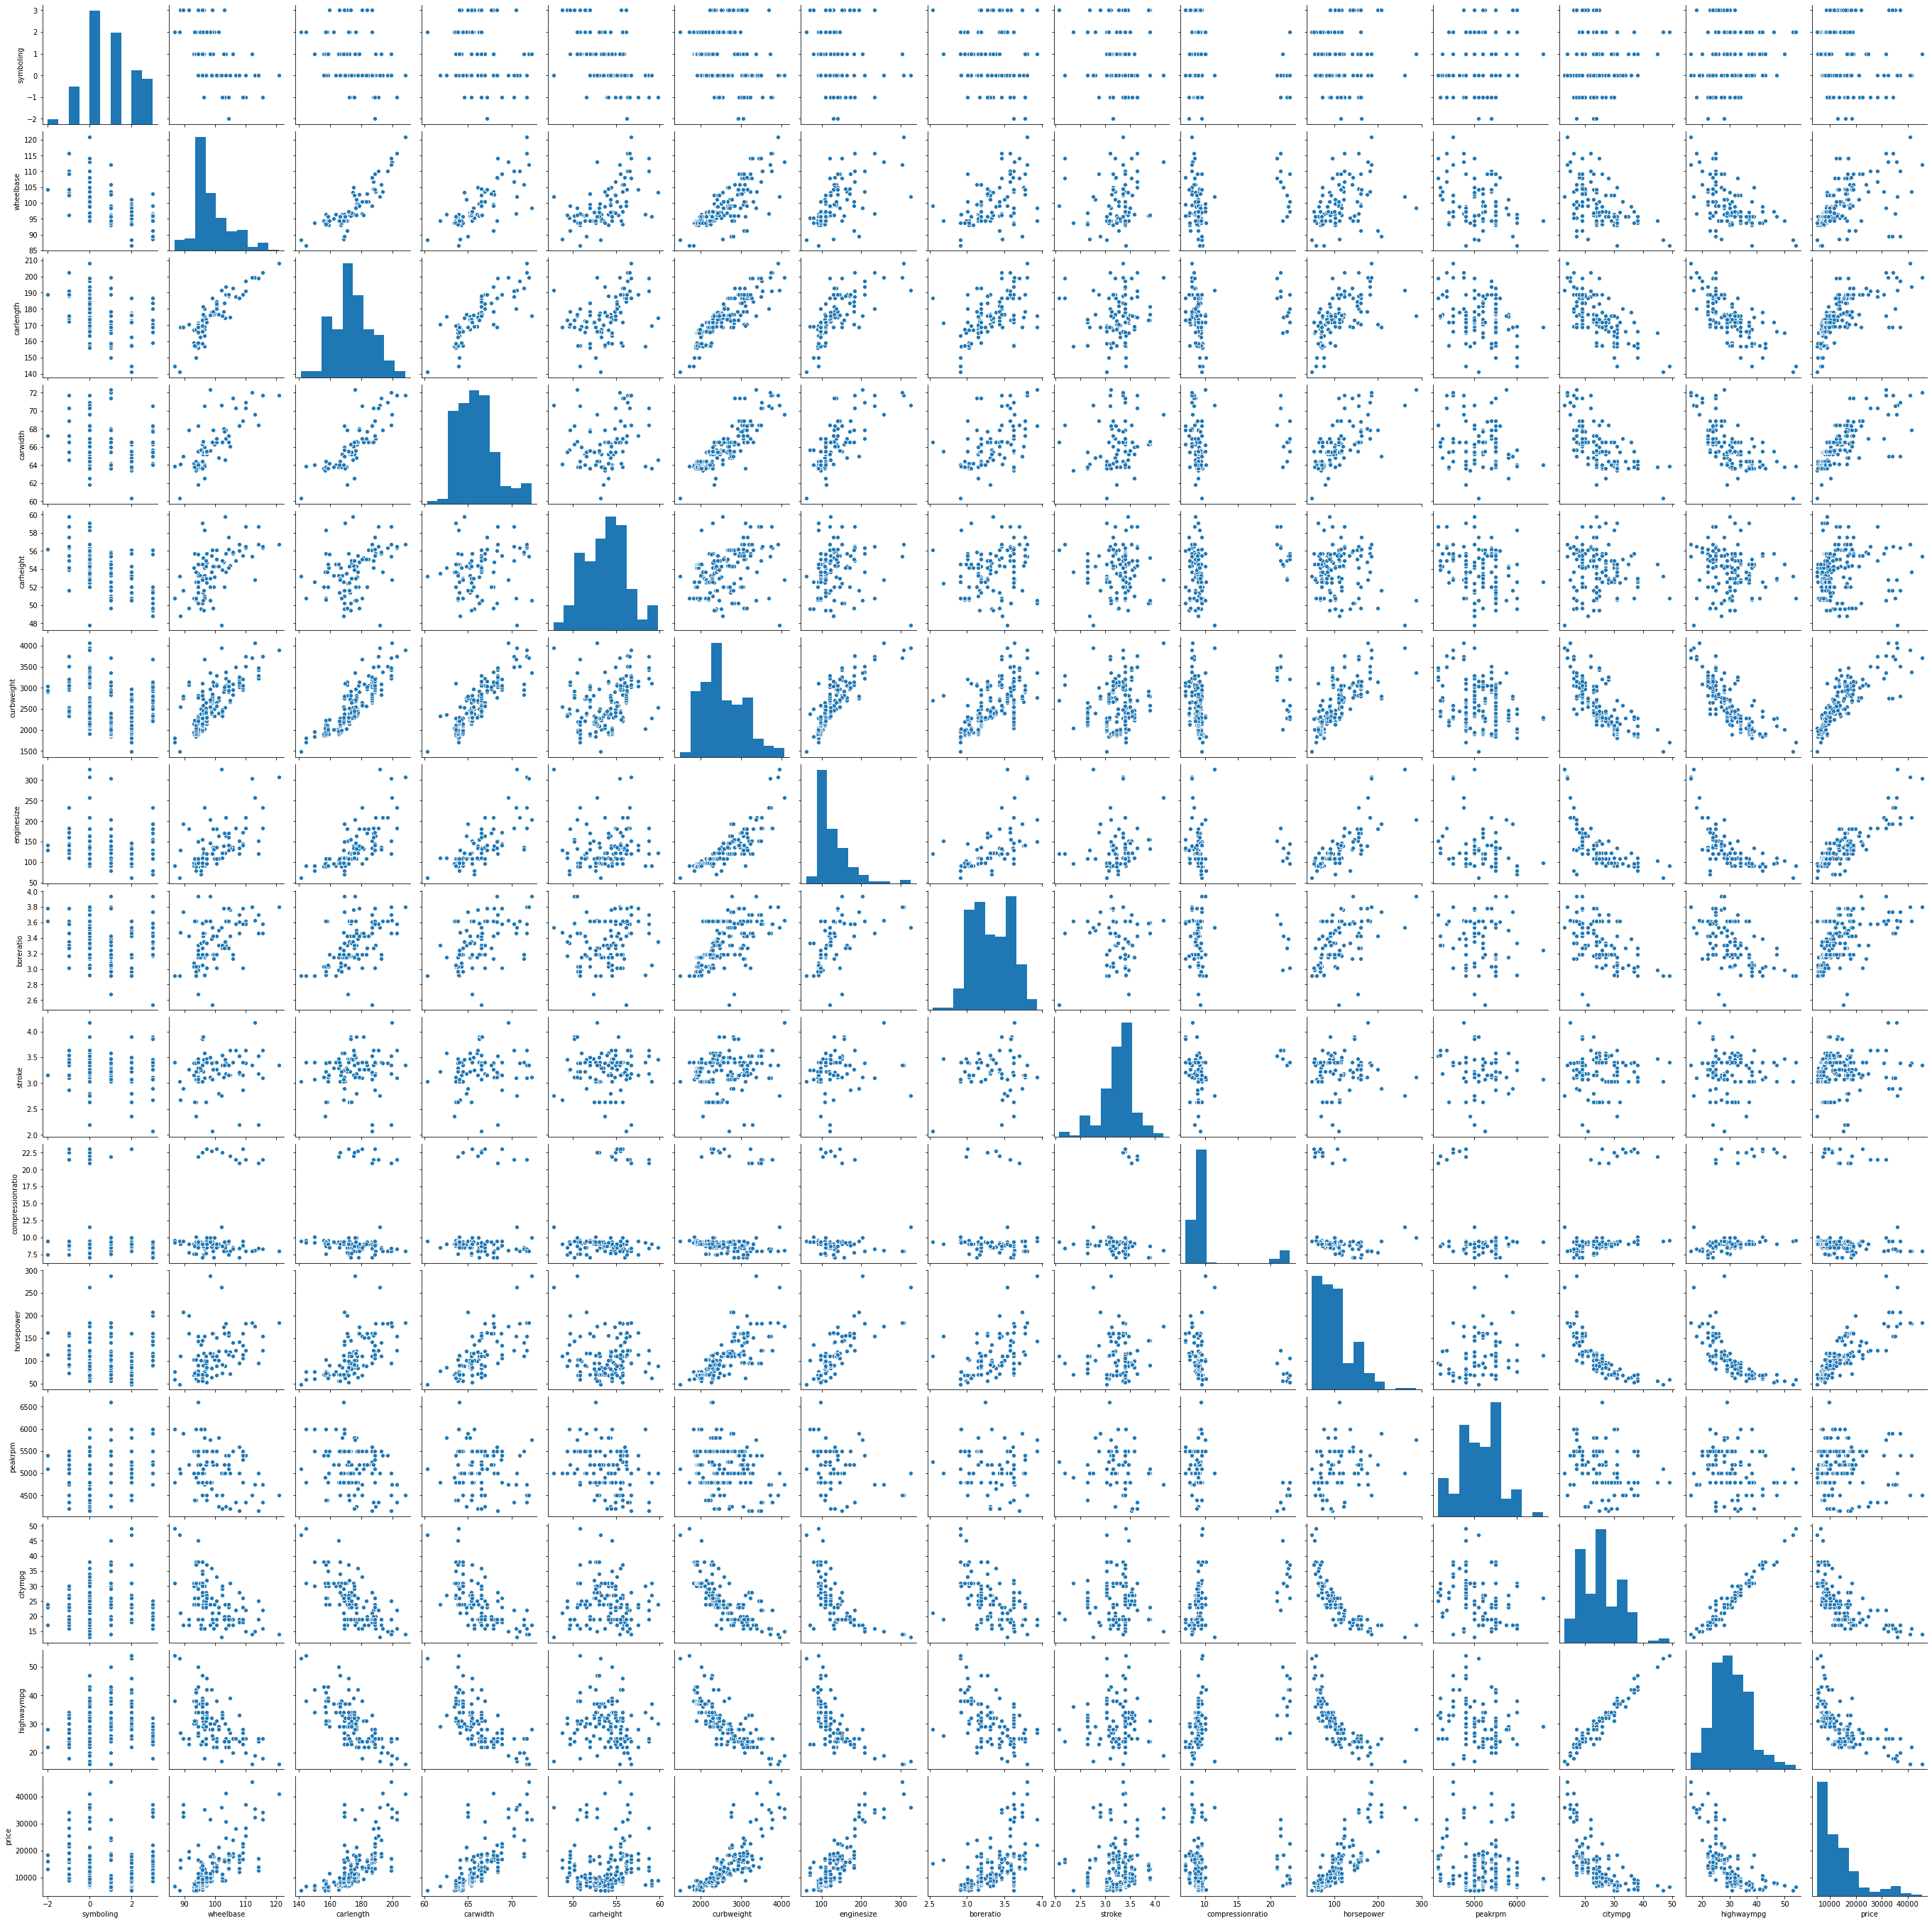

In [13]:
sns.pairplot(df)

Visualising Categorical Variables

In [14]:
#As 'symboling' is the categorical variable, we need to convert it into 'category'
df['symboling'] = df['symboling'].astype('category')

In [15]:
cat_var = df.select_dtypes(['O']).columns.tolist()

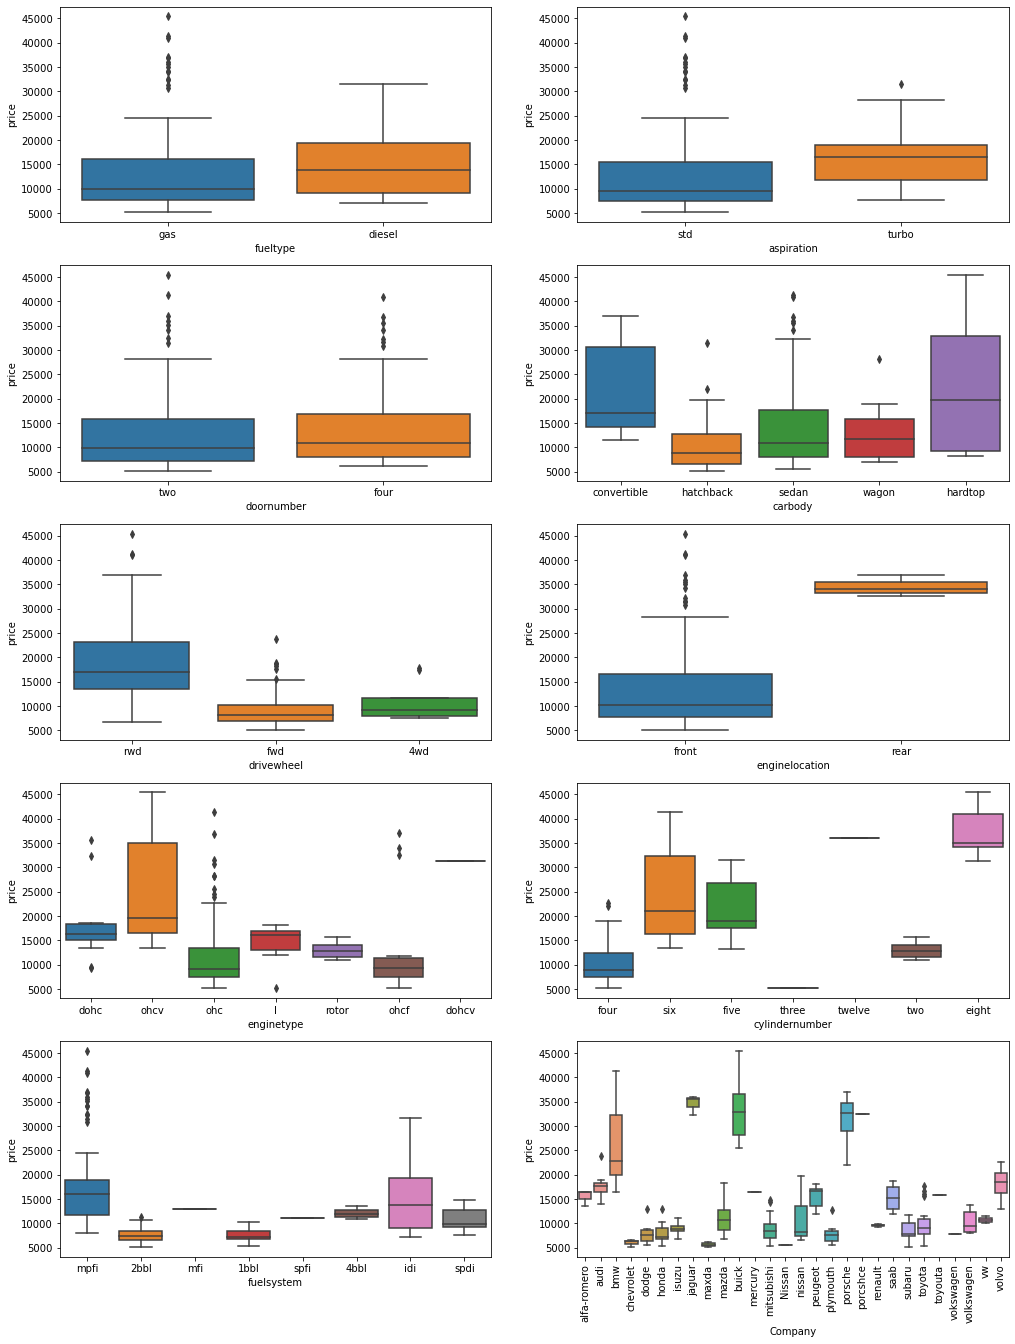

In [16]:
plt.figure(figsize=(17,23))
for i in range(len(cat_var)):
    plt.subplot(5,2,i+1)
    sns.boxplot(y=df['price'],x=df[cat_var[i]])
    if cat_var[i] == 'Company':
        plt.xticks(rotation=90)

We can see there are redundancy in the company column

In [17]:
df['Company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
vokswagen       1
porcshce        1
Nissan          1
mercury         1
toyouta         1
Name: Company, dtype: int64

As we see ('vw', 'vokswagen', 'volkswagen') are same ('porcshce', 'porsche') are same and ('toyota','toyouta') are same

In [18]:
def Company_(a):
    if a == 'vokswagen':
        return('volkswagen')
    elif a == 'vw':
        return('volkswagen')
    elif a == 'porcshce':
        return('porsche')
    elif a == 'toyouta':
        return('toyota')
    elif a == 'maxda':
        return('mazda') 
    elif a == 'Nissan':
        return('nissan')
    else:
        return(a)
df['Company'] = df['Company'].map(Company_)

# Data Preparation
As there are no variables with 'yes' and 'no' we can proceed for dummy variables
Dummy Variables

In [19]:
cat_var = df.select_dtypes('O','category')
cat_var['symboling'] = df['symboling']
cat_var = cat_var.columns.tolist()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
dummies = pd.get_dummies(df[cat_var],drop_first=True)

In [21]:
df_new = pd.concat([df,dummies],axis=1)

In [22]:
df_new.shape

(205, 80)

In [23]:
df_new.drop(columns=cat_var,inplace=True)

In [24]:
df_new.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,1,0


# Splitting Dataset into training and test sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 100)

# Rescaling features

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
num_var = df_train.select_dtypes(['int64', 'float64']).columns.tolist()

In [30]:
#Applying scaler to all the variables leaving the dummy variables
df_train[num_var] = scaler.fit_transform(df_train[num_var])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [31]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,1,1,0,0,0,0


In [32]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.020979,0.076923,0.139860,0.048951,0.041958,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.143818,0.267406,0.348061,0.216524,0.201198,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


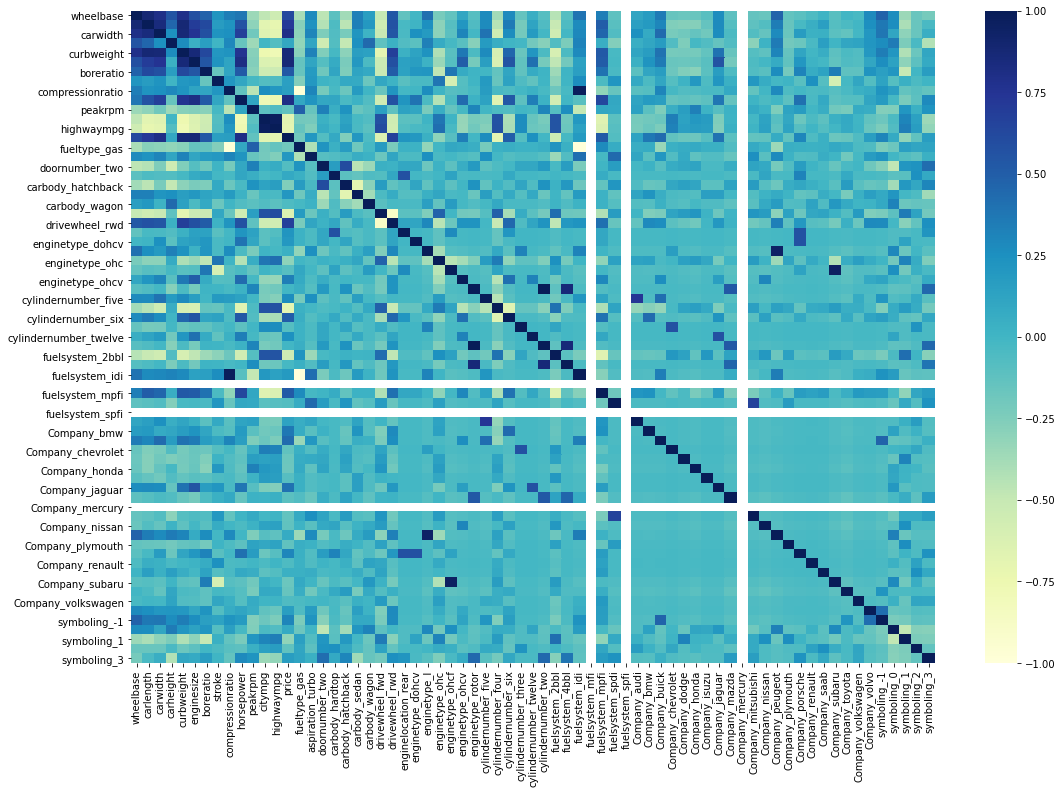

In [33]:
#Checking the correlation coefficient
plt.figure(figsize=(18,12))
sns.heatmap(df_train.corr(),cmap="YlGnBu")

# Building model

In [34]:
import statsmodels.api as sm

In [35]:
y_train = df_train.pop('price')
X_train = df_train

In [36]:
X_train_lm = sm.add_constant(X_train)

# Model Number 1

In [37]:
LR1 = sm.OLS(y_train,X_train_lm).fit()

In [38]:
LR1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     53.29
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           9.90e-47
Time:                        10:31:40   Log-Likelihood:                 282.70
No. Observations:                 143   AIC:                            -441.4
Df Residuals:                      81   BIC:                            -257.7
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2316      0.178     -1.305      0.196      -0.585       0.122
wheelbase                 0.1718      0.104      1.654      0.102      -0.035       0.378
carlength                -0.1449      0.104     -1.396      0.167      -0.351       0.062
carwidth                  0.2616      0.105      2.499      0.014       0.053       0.470
carheight                -0.1612      0.055     -2.941      0.004      -0.270      -0.052
curbweight                0.3319      0.132      2.506      0.014       0.068       0.595
enginesize                2.0490      0.473      4.332      0.000       1.108       2.990
boreratio                -0.6249      0.175     -3.579      0.001      -0.972      -0.278
stroke                   -0.1983      0.086     -2.312      0.023      -0.369      -0.028
compressionratio         -0.2866      0.283     -1.011      0.315      -0.851       0.277
horsepower               -0.1637      0.219     -0.747      0.457      -0.599       0.272
peakrpm                   0.1930      0.055      3.520      0.001       0.084       0.302
citympg                  -0.0399      0.163     -0.245      0.807      -0.364       0.284
highwaympg                0.1107      0.145      0.766      0.446      -0.177       0.399
fueltype_gas             -0.2282      0.099     -2.316      0.023      -0.424      -0.032
aspiration_turbo          0.0727      0.031      2.365      0.020       0.012       0.134
doornumber_two           -0.0130      0.015     -0.849      0.398      -0.043       0.017
carbody_hardtop          -0.1097      0.063     -1.730      0.087      -0.236       0.016
carbody_hatchback        -0.1070      0.047     -2.253      0.027      -0.201      -0.012
carbody_sedan            -0.0920      0.051     -1.821      0.072      -0.193       0.009
carbody_wagon            -0.0770      0.053     -1.459      0.149      -0.182       0.028
drivewheel_fwd           -0.0052      0.025     -0.207      0.836      -0.055       0.045
drivewheel_rwd            0.0253      0.037      0.694      0.490      -0.047       0.098
enginelocation_rear       0.1933      0.070      2.749      0.007       0.053       0.333
enginetype_dohcv          0.2183      0.176      1.242      0.218      -0.132       0.568
enginetype_l              0.2216      0.083      2.659      0.009       0.056       0.387
enginetype_ohc            0.0096      0.046      0.210      0.834      -0.082       0.101
enginetype_ohcf           0.1685      0.043      3.963      0.000       0.084       0.253
enginetype_ohcv          -0.0328      0.041     -0.794      0.429      -0.115       0.049
enginetype_rotor          0.4065      0.116      3.501      0.001       0.176       0.638
cylindernumber_five       0.2699      0.143      1.887      0.063      -0.015       0.555
cylindernumber_four    

# Feature elimination using RFE

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [40]:
variables = df_train.columns.tolist()

In [41]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,1,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,1,1,0,0,0,0


In [42]:
xvar = [x for x in variables if x != 'price']
yvar = ['price']
Xr = df_train[xvar]
Yr = y_train
model = LinearRegression()
rfe = RFE(model, 15)
fit = rfe.fit(Xr, Yr)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
Selected Features: [False False  True False  True  True  True  True False False False False
 False False False False False False False False False False  True False
 False False False False  True  True  True False  True  True  True False
 False False False False False False False  True False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False]
Feature Ranking: [ 8 14  1 10  1  1  1  1 19  3  5 29 20 18  7 46 25 24 26 27 51 33  1  6
  2 48 16 40  1  1  1 22  1  1  1 28 32 23 53 49 50 52 30  1 38 17 12 15
 39 21 34 54  4 36  1 11  1 47  9 45 37 35 13 31 41 43 42 44]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [43]:
rfevariables = dict(zip(xvar,fit.support_))

In [44]:
rfevariables = [x for x in rfevariables if rfevariables[x] == True]

In [45]:
rfevariables

['carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'enginelocation_rear',
 'enginetype_rotor',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'Company_bmw',
 'Company_peugeot',
 'Company_porsche']

# Model Number 2

In [46]:
df_train = df_train[rfevariables]

In [47]:
X_train = df_train
X_train_lm = sm.add_constant(X_train)

In [48]:
LR2 = sm.OLS(y_train,X_train_lm).fit()
LR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.03e-70
Time:                        11:01:06   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2770      0.038     -7.337      0.000      -0.352      -0.202
carwidth                  0.3471      0.063      5.548      0.000       0.223       0.471
curbweight                0.3785      0.075      5.048      0.000       0.230       0.527
enginesize                1.2372      0.159      7.786      0.000       0.923       1.552
boreratio                -0.3581      0.054     -6.662      0.000      -0.464      -0.252
stroke                   -0.2639      0.047     -5.666      0.000      -0.356      -0.172
enginelocation_rear       0.3506      0.075      4.700      0.000       0.203       0.498
enginetype_rotor          0.2383      0.033      7.193      0.000       0.173       0.304
cylindernumber_five       0.1581      0.033      4.819      0.000       0.093       0.223
cylindernumber_four       0.2259      0.039      5.819      0.000       0.149       0.303
cylindernumber_three      0.4553      0.075      6.095      0.000       0.307       0.603
cylindernumber_twelve    -0.4461      0.098     -4.553      0.000      -0.640      -0.252
cylindernumber_two        0.2383      0.033      7.193      0.000       0.173       0.304
Company_bmw               0.2821      0.027     10.632      0.000       0.230       0.335
Company_peugeot          -0.1091      0.027     -4.115      0.000      -0.162      -0.057
Company_porsche           0.1779      0.045      3.965      0.000       0.089       0.267
==============================================================================
Omnibus:                       22.727   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.186
Skew:                           0.769   Prob(JB):                     5.10e-09
Kurtosis:                       5.011   Cond. No.                     1.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
8,cylindernumber_four,24.19
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67


In [51]:
to_drop = ['cylindernumber_two']

In [52]:
X_train.drop(columns=to_drop,inplace=True)

# Model Number 3

In [53]:
X_train_lm = sm.add_constant(X_train)
LR3 = sm.OLS(y_train,X_train_lm).fit()
LR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.03e-70
Time:                        11:03:35   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2770      0.038     -7.337      0.000      -0.352      -0.202
carwidth                  0.3471      0.063      5.548      0.000       0.223       0.471
curbweight                0.3785      0.075      5.048      0.000       0.230       0.527
enginesize                1.2372      0.159      7.786      0.000       0.923       1.552
boreratio                -0.3581      0.054     -6.662      0.000      -0.464      -0.252
stroke                   -0.2639      0.047     -5.666      0.000      -0.356      -0.172
enginelocation_rear       0.3506      0.075      4.700      0.000       0.203       0.498
enginetype_rotor          0.4766      0.066      7.193      0.000       0.345       0.608
cylindernumber_five       0.1581      0.033      4.819      0.000       0.093       0.223
cylindernumber_four       0.2259      0.039      5.819      0.000       0.149       0.303
cylindernumber_three      0.4553      0.075      6.095      0.000       0.307       0.603
cylindernumber_twelve    -0.4461      0.098     -4.553      0.000      -0.640      -0.252
Company_bmw               0.2821      0.027     10.632      0.000       0.230       0.335
Company_peugeot          -0.1091      0.027     -4.115      0.000      -0.162      -0.057
Company_porsche           0.1779      0.045      3.965      0.000       0.089       0.267
==============================================================================
Omnibus:                       22.727   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.186
Skew:                           0.769   Prob(JB):                     5.10e-09
Kurtosis:                       5.011   Cond. No.                         69.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
8,cylindernumber_four,24.19
6,enginetype_rotor,3.95
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67
13,Company_porsche,1.93


As we see p value for the features 'cylindernumber_five' and 'cylindernumber_twelve' is very high. Dropping those variables

# Model Number 4

In [55]:
to_drop = ['enginesize']
# vif[vif['VIF'] > 50].Features.tolist()

X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR4 = sm.OLS(y_train,X_train_lm).fit()
LR4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           5.01e-61
Time:                        11:05:00   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1639      0.042     -3.890      0.000      -0.247      -0.081
carwidth                  0.3765      0.076      4.985      0.000       0.227       0.526
curbweight                0.6404      0.081      7.902      0.000       0.480       0.801
boreratio                -0.0908      0.050     -1.815      0.072      -0.190       0.008
stroke                   -0.0281      0.043     -0.656      0.513      -0.113       0.057
enginelocation_rear       0.4270      0.089      4.775      0.000       0.250       0.604
enginetype_rotor          0.0454      0.044      1.032      0.304      -0.042       0.132
cylindernumber_five      -0.0102      0.030     -0.342      0.733      -0.069       0.049
cylindernumber_four      -0.0051      0.030     -0.170      0.866      -0.065       0.055
cylindernumber_three      0.1933      0.081      2.397      0.018       0.034       0.353
cylindernumber_twelve     0.1524      0.073      2.075      0.040       0.007       0.298
Company_bmw               0.2672      0.032      8.351      0.000       0.204       0.331
Company_peugeot          -0.1489      0.031     -4.731      0.000      -0.211      -0.087
Company_porsche           0.1596      0.054      2.945      0.004       0.052       0.267
==============================================================================
Omnibus:                       21.617   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.220
Skew:                           0.641   Prob(JB):                     1.52e-10
Kurtosis:                       5.439   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,40.31
0,carwidth,39.80
2,boreratio,22.51
3,stroke,16.12
7,cylindernumber_four,10.07
12,Company_porsche,1.92
6,cylindernumber_five,1.70
4,enginelocation_rear,1.62
11,Company_peugeot,1.42
5,enginetype_rotor,1.37


# Model Number 5

In [57]:
#Dropping 'cylindernumber_four' and 'stroke'
to_drop = ['cylindernumber_five']
# vif[vif['VIF'] > 20].Features.tolist()

X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR5 = sm.OLS(y_train,X_train_lm).fit()
LR5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           4.93e-62
Time:                        11:12:29   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     130   BIC:                            -314.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1664      0.041     -4.022      0.000      -0.248      -0.085
carwidth                  0.3686      0.072      5.142      0.000       0.227       0.510
curbweight                0.6478      0.078      8.322      0.000       0.494       0.802
boreratio                -0.0913      0.050     -1.832      0.069      -0.190       0.007
stroke                   -0.0288      0.043     -0.677      0.500      -0.113       0.055
enginelocation_rear       0.4262      0.089      4.783      0.000       0.250       0.602
enginetype_rotor          0.0494      0.042      1.171      0.244      -0.034       0.133
cylindernumber_four      -0.0013      0.028     -0.048      0.962      -0.057       0.054
cylindernumber_three      0.1962      0.080      2.455      0.015       0.038       0.354
cylindernumber_twelve     0.1552      0.073      2.133      0.035       0.011       0.299
Company_bmw               0.2697      0.031      8.684      0.000       0.208       0.331
Company_peugeot          -0.1491      0.031     -4.755      0.000      -0.211      -0.087
Company_porsche           0.1631      0.053      3.074      0.003       0.058       0.268
==============================================================================
Omnibus:                       22.446   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.264
Skew:                           0.656   Prob(JB):                     3.31e-11
Kurtosis:                       5.526   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.12
0,carwidth,33.98
2,boreratio,22.51
3,stroke,15.91
6,cylindernumber_four,8.80
11,Company_porsche,1.85
4,enginelocation_rear,1.61
10,Company_peugeot,1.41
5,enginetype_rotor,1.30
8,cylindernumber_twelve,1.17


# Model Number 6

In [59]:
to_drop = ['cylindernumber_four']
X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR6 = sm.OLS(y_train,X_train_lm).fit()
LR6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           4.37e-63
Time:                        11:13:15   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1678      0.028     -5.892      0.000      -0.224      -0.111
carwidth                  0.3696      0.068      5.419      0.000       0.235       0.505
curbweight                0.6499      0.063     10.310      0.000       0.525       0.775
boreratio                -0.0927      0.040     -2.302      0.023      -0.172      -0.013
stroke                   -0.0293      0.041     -0.711      0.478      -0.111       0.052
enginelocation_rear       0.4273      0.086      4.988      0.000       0.258       0.597
enginetype_rotor          0.0506      0.034      1.479      0.142      -0.017       0.118
cylindernumber_three      0.1981      0.069      2.862      0.005       0.061       0.335
cylindernumber_twelve     0.1547      0.072      2.151      0.033       0.012       0.297
Company_bmw               0.2702      0.029      9.298      0.000       0.213       0.328
Company_peugeot          -0.1499      0.026     -5.660      0.000      -0.202      -0.098
Company_porsche           0.1633      0.053      3.098      0.002       0.059       0.268
==============================================================================
Omnibus:                       22.405   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.286
Skew:                           0.654   Prob(JB):                     3.27e-11
Kurtosis:                       5.529   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,33.96
1,curbweight,23.47
2,boreratio,9.90
3,stroke,7.65
10,Company_porsche,1.77
4,enginelocation_rear,1.60
9,Company_peugeot,1.24
7,cylindernumber_twelve,1.13
8,Company_bmw,1.12
5,enginetype_rotor,1.04


# Model Number 7

In [61]:
to_drop = ['stroke']
X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR7 = sm.OLS(y_train,X_train_lm).fit()
LR7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           4.72e-64
Time:                        11:13:59   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1828      0.019     -9.527      0.000      -0.221      -0.145
carwidth                  0.3631      0.067      5.382      0.000       0.230       0.497
curbweight                0.6418      0.062     10.374      0.000       0.519       0.764
boreratio                -0.0820      0.037     -2.199      0.030      -0.156      -0.008
enginelocation_rear       0.4282      0.085      5.008      0.000       0.259       0.597
enginetype_rotor          0.0502      0.034      1.468      0.145      -0.017       0.118
cylindernumber_three      0.1987      0.069      2.875      0.005       0.062       0.335
cylindernumber_twelve     0.1673      0.070      2.405      0.018       0.030       0.305
Company_bmw               0.2720      0.029      9.413      0.000       0.215       0.329
Company_peugeot          -0.1483      0.026     -5.630      0.000      -0.200      -0.096
Company_porsche           0.1644      0.053      3.126      0.002       0.060       0.268
==============================================================================
Omnibus:                       22.096   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.356
Skew:                           0.664   Prob(JB):                     1.42e-10
Kurtosis:                       5.419   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.35
1,curbweight,23.19
2,boreratio,9.79
9,Company_porsche,1.64
3,enginelocation_rear,1.57
8,Company_peugeot,1.18
7,Company_bmw,1.12
6,cylindernumber_twelve,1.07
4,enginetype_rotor,1.04
5,cylindernumber_three,1.01


# Model Number 8

In [63]:
to_drop = ['enginetype_rotor']
X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR8 = sm.OLS(y_train,X_train_lm).fit()
LR8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.09e-64
Time:                        11:15:01   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1826      0.019     -9.475      0.000      -0.221      -0.144
carwidth                  0.3680      0.068      5.437      0.000       0.234       0.502
curbweight                0.6354      0.062     10.252      0.000       0.513       0.758
boreratio                -0.0785      0.037     -2.099      0.038      -0.152      -0.005
enginelocation_rear       0.4301      0.086      5.010      0.000       0.260       0.600
cylindernumber_three      0.1978      0.069      2.851      0.005       0.061       0.335
cylindernumber_twelve     0.1666      0.070      2.384      0.019       0.028       0.305
Company_bmw               0.2707      0.029      9.332      0.000       0.213       0.328
Company_peugeot          -0.1500      0.026     -5.679      0.000      -0.202      -0.098
Company_porsche           0.1605      0.053      3.043      0.003       0.056       0.265
==============================================================================
Omnibus:                       20.602   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.955
Skew:                           0.639   Prob(JB):                     2.11e-09
Kurtosis:                       5.253   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.25
1,curbweight,23.05
2,boreratio,9.73
8,Company_porsche,1.64
3,enginelocation_rear,1.57
7,Company_peugeot,1.18
6,Company_bmw,1.12
5,cylindernumber_twelve,1.07
4,cylindernumber_three,1.01


# Model Number 9

In [65]:
to_drop = ['carwidth']
X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR9 = sm.OLS(y_train,X_train_lm).fit()
LR9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           5.28e-60
Time:                        11:16:10   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1258      0.018     -7.053      0.000      -0.161      -0.091
curbweight                0.9073      0.040     22.497      0.000       0.828       0.987
boreratio                -0.0733      0.041     -1.781      0.077      -0.155       0.008
enginelocation_rear       0.3018      0.091      3.319      0.001       0.122       0.482
cylindernumber_three      0.1401      0.076      1.855      0.066      -0.009       0.289
cylindernumber_twelve     0.1625      0.077      2.111      0.037       0.010       0.315
Company_bmw               0.2505      0.032      7.903      0.000       0.188       0.313
Company_peugeot          -0.1464      0.029     -5.034      0.000      -0.204      -0.089
Company_porsche           0.2381      0.056      4.259      0.000       0.128       0.349
==============================================================================
Omnibus:                       18.903   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.663
Skew:                          -0.152   Prob(JB):                     1.85e-18
Kurtosis:                       6.690   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.38
1,boreratio,8.18
7,Company_porsche,1.61
2,enginelocation_rear,1.50
6,Company_peugeot,1.16
5,Company_bmw,1.09
4,cylindernumber_twelve,1.07
3,cylindernumber_three,1.01


# Model Number 10

In [67]:
to_drop = ['boreratio']
X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR10 = sm.OLS(y_train,X_train_lm).fit()
LR10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.97e-60
Time:                        11:17:05   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1449      0.014    -10.087      0.000      -0.173      -0.116
curbweight                0.8671      0.034     25.755      0.000       0.800       0.934
enginelocation_rear       0.3085      0.092      3.369      0.001       0.127       0.490
cylindernumber_three      0.1458      0.076      1.917      0.057      -0.005       0.296
cylindernumber_twelve     0.1700      0.077      2.195      0.030       0.017       0.323
Company_bmw               0.2482      0.032      7.776      0.000       0.185       0.311
Company_peugeot          -0.1535      0.029     -5.287      0.000      -0.211      -0.096
Company_porsche           0.2087      0.054      3.876      0.000       0.102       0.315
==============================================================================
Omnibus:                       14.160   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.339
Skew:                          -0.024   Prob(JB):                     8.66e-11
Kurtosis:                       5.788   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Company_porsche,1.55
1,enginelocation_rear,1.50
0,curbweight,1.33
5,Company_peugeot,1.16
4,Company_bmw,1.09
3,cylindernumber_twelve,1.04
2,cylindernumber_three,1.00


# Model Number 11

In [69]:
to_drop = ['cylindernumber_three']
X_train.drop(columns=to_drop,inplace=True)
X_train_lm = sm.add_constant(X_train)
LR11 = sm.OLS(y_train,X_train_lm).fit()
LR11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           8.77e-61
Time:                        11:18:09   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1397      0.014     -9.807      0.000      -0.168      -0.112
curbweight                0.8563      0.034     25.547      0.000       0.790       0.923
enginelocation_rear       0.3072      0.092      3.322      0.001       0.124       0.490
cylindernumber_twelve     0.1751      0.078      2.240      0.027       0.021       0.330
Company_bmw               0.2492      0.032      7.732      0.000       0.185       0.313
Company_peugeot          -0.1515      0.029     -5.168      0.000      -0.209      -0.094
Company_porsche           0.2101      0.054      3.865      0.000       0.103       0.318
==============================================================================
Omnibus:                       13.430   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               41.172
Skew:                           0.059   Prob(JB):                     1.15e-09
Kurtosis:                       5.626   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Company_porsche,1.55
1,enginelocation_rear,1.50
0,curbweight,1.33
4,Company_peugeot,1.16
3,Company_bmw,1.09
2,cylindernumber_twelve,1.04


# Final features that will be used to predict the test dataset

Company_porsche
enginelocation_rear
curbweight
Company_peugeot
Company_bmw
cylindernumber_twelve

In [71]:
print(LR11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           8.77e-61
Time:                        11:19:36   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [72]:
y_pred=LR11.predict(X_train_lm)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.882881709004953

Text(0, 0.5, 'y_test')

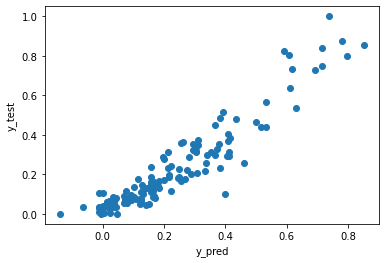

In [74]:
plt.scatter(y_pred,y_train)
plt.xlabel('y_pred')
plt.ylabel('y_test')

# Residual Analysis

Text(0.5, 0, 'Errors')

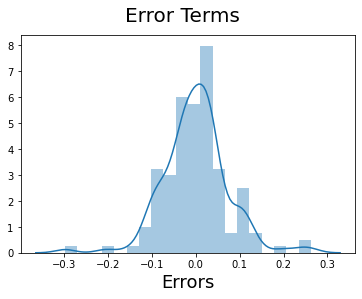

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Applying on test Dataset

In [76]:
varis = df_train.columns.tolist()
varis.append('price')
df_test[varis] = scaler.fit_transform(df_test[varis])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [77]:
y_test = df_test[varis].pop('price')
X_test = df_test[varis].iloc[:,:-1]

In [78]:
X_test_lm = sm.add_constant(X_test)

In [79]:
y_test_pred = LR11.predict(X_test_lm)

Text(0, 0.5, 'y_test')

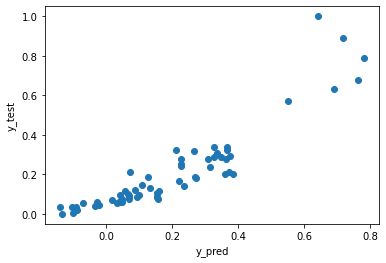

In [80]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [81]:
df_pred = pd.DataFrame()
df_pred['actual'] = y_test
df_pred['predict'] = y_test_pred
df_pred['diff'] = y_test - y_test_pred
df_pred.head()

,actual,predict,diff
160,0.058474,-0.026551,0.085025
186,0.077398,0.047925,0.029473
59,0.086148,0.093187,-0.007039
165,0.097473,0.043810,0.053662
140,0.055099,0.033523,0.021575


# Finding out r2 score

In [82]:
r2_score(df_pred['actual'],df_pred['predict'])

0.8060376216194985

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 